### Preparando o ambiente

In [1]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# direciona para o caminho desejado
%cd /content/drive/MyDrive/PRETALAB/Análise \de \Dados/Aula03

/content/drive/MyDrive/PRETALAB/Análise de Dados/Aula03


In [3]:
#Este módulo fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional
import os

# os.getcwd() retorna o caminho absoluto do diretório de trabalho atual
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Análise de Dados/Aula03


In [4]:
# Mostra o conteudo do local/pasta
!ls

'Aula3 - Análise de Dados.ipynb'


# Análise de Dados do Mundo Real


Para esta aula vamos realizar uma análise completa com base de dados de saúde mental na indústria de tecnologia, comecaremos com a extração dos dados utilizando o KaggleHub. Faremos o download da base, organizaremos e armazenaremos os dados em um banco de dados SQLite, e finalmente realizaremos as etapas de análise, desde a limpeza até a aplicação de testes de hipóteses, probabilidade e visualização.




Conjunto de dados: [Saúde Mental](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry)

## Extração dos Dados

### Importando bibliotecas

In [5]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Liberar memória manualmente
import gc

## Extraindo os dados

In [6]:
# Download do dataset de saúde  mental na indústria  da tecnologia
path = kagglehub.dataset_download("anth7310/mental-health-in-the-tech-industry")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/anth7310/mental-health-in-the-tech-industry/versions/7


In [7]:
# Verificar arquivos dentro do dataset
!ls /root/.cache/kagglehub/datasets/anth7310/mental-health-in-the-tech-industry/versions/7

mental_health.sqlite


## Abrir e Manipular o Banco de Dados SQLite

Depois de baixar o dataset, que já está  no formato SQLite, podemos abrir o banco de dados e copiar suas tabelas para um novo banco de dados local.

In [8]:
# Bibliotecas
import sqlite3
import os

In [9]:
# Caminho do banco de dados baixado
db_path = os.path.join(path, 'mental_health.sqlite')

In [10]:
# Conectar ao banco de dados SQLite
conn_original = sqlite3.connect(db_path)
cursor_original = conn_original.cursor()

In [11]:
# Exibir as tabelas disponiveis no banco de dados
cursor_original.execute("SELECT name FROM sqlite_master WHERE type='table';")
tabelas = cursor_original.fetchall()
print(f'Tabelas disponíveis: {tabelas}')

Tabelas disponíveis: [('Answer',), ('Question',), ('Survey',)]


In [12]:
# Commitar as mudanças e fechar a conexão com o banco de dados
conn_original.commit()
conn_original.close()

## Consultas e Cruzamentos no Banco de Dados

Nesta etapa, faremos consultas no banco de dados para obter informacoes sobre idade, gênero  e tratamento de saúde mental. Estamos interessados em observar como esses fatores interagem.

In [86]:
# Conectar ao banco de dados SQLite
conn_original = sqlite3.connect(db_path)
cursor_original = conn_original.cursor()

In [14]:
# Consultar a estrutura das tabelas
cursor_original.execute("PRAGMA table_info('Answer')")
print(cursor_original.fetchall())

[(0, 'AnswerText', 'VARCHAR(10000)', 0, None, 0), (1, 'SurveyID', 'INTEGER', 0, None, 0), (2, 'UserID', 'INTEGER', 0, None, 0), (3, 'QuestionID', 'INTEGER', 0, None, 0)]


In [15]:
# Consultar a estrutura das tabelas
cursor_original.execute("PRAGMA table_info('Question')")
print(cursor_original.fetchall())

[(0, 'questiontext', 'VARCHAR(1000)', 0, None, 0), (1, 'questionid', 'INTEGER', 0, None, 0)]


In [16]:
# Consultar a estrutura das tabelas
cursor_original.execute("PRAGMA table_info('Survey')")
print(cursor_original.fetchall())

[(0, 'SurveyID', 'INTEGER', 1, None, 1), (1, 'Description', 'VARCHAR(255)', 0, None, 0)]


- 'PRAGMA' = .info() no pandas

In [17]:
# Consultar dados de respostas sobre gênero, idade e saúde mental
query = '''
    SELECT q.questiontext, a.AnswerText
    FROM Answer a
    JOIN Question q ON a.QuestionID = q.questionid
    JOIN Survey s ON a.surveyID = s.SurveyID
    WHERE q.questiontext IN ('Age', 'Gender', 'Do yo seek treatment for mental health?');
'''

In [18]:
# Inserir a query em um df pandas
df_answer = pd.read_sql_query(query, conn_original)

# Visualisar
df_answer.head()

# Exclui o objeto e força a coleta de lixo
del df_answer
gc.collect()

0

Não deu certo fazer o JOIN (MERGE = pd) com o SQL, vamos fazer abaixo com o pandas!

In [19]:
# Selecionando toda a tabela 'answer'
query_asw = '''
    SELECT *
    FROM Answer;
'''
# Selecionando toda a tabela 'question'
query_quest = '''
    SELECT *
    FROM Question;
'''

# Selecionando toda a tabela 'survey'
query_survey = '''
    SELECT *
    FROM Survey;
'''

In [87]:
# Inserir a query em um df pandas
df_answers = pd.read_sql_query(query_asw, conn_original)
df_question = pd.read_sql_query(query_quest, conn_original)
df_survey = pd.read_sql_query(query_survey, conn_original)

In [88]:
# Visualisar
df_answers.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [89]:
# Visualisar
df_question.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [23]:
# Visualisar
df_survey.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [24]:
# MERGE
df = pd.merge(df_answers, df_survey, on='SurveyID')

In [25]:
# Visualizar merge
df.head()

,AnswerText,SurveyID,UserID,QuestionID,Description
0,37,2014,1,1,mental health survey for 2014
1,44,2014,2,1,mental health survey for 2014
2,32,2014,3,1,mental health survey for 2014
3,31,2014,4,1,mental health survey for 2014
4,31,2014,5,1,mental health survey for 2014


- o código abaixo faz uma junção entre os dois DataFrames com base nos valores correspondentes nas colunas 'QuestionID' de df e 'questionid' de df_question, retornando apenas as linhas que possuem correspondência em ambas as tabelas. Usado em caso de colunas com nomes diferentes porem com a mesma informação/tipo.

In [26]:
# MERGE (método 'left_on=' e 'rigth_on=' para selecionar as colunas que vão ser mescladas e o método 'how=' para mostrar como elas serão mescladas)
df = pd.merge(df, df_question, left_on='QuestionID', right_on='questionid', how='inner')

In [27]:
# Exclui o objeto e força a coleta de lixo
del df_question
gc.collect()

# Exclui o objeto e força a coleta de lixo
del df_survey
gc.collect()

# Exclui o objeto e força  a coleta de lixo
del df_answers
gc.collect()

0

In [28]:
# Visualizar df
df.head()

,AnswerText,SurveyID,UserID,QuestionID,Description,questiontext,questionid
0,37,2014,1,1,mental health survey for 2014,What is your age?,1
1,44,2014,2,1,mental health survey for 2014,What is your age?,1
2,32,2014,3,1,mental health survey for 2014,What is your age?,1
3,31,2014,4,1,mental health survey for 2014,What is your age?,1
4,31,2014,5,1,mental health survey for 2014,What is your age?,1


In [29]:
# Verificar a coluna 'questiontext' para criar um filtro
# df['questiontext'].unique()

In [30]:
# Filtro para separar algumas perguntas da coluna 'questiontext' do df após o merge
df_final = df[(df['questiontext'] == 'What is your age?')
    | (df['questiontext'] == 'What is your gender?')
    | (df['questiontext'] == 'Have you ever sought treatment for a mental health disorder from a mental health professional?')]

In [31]:
# Informações sobre o df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12654 entries, 0 to 206052
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AnswerText    12654 non-null  object
 1   SurveyID      12654 non-null  int64 
 2   UserID        12654 non-null  int64 
 3   QuestionID    12654 non-null  int64 
 4   Description   12654 non-null  object
 5   questiontext  12654 non-null  object
 6   questionid    12654 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 790.9+ KB


Usei o método de despivotar para transformar as perguntas em colunas e as respostas em linhas.

In [32]:
# Use pivot_table() com uma função de agregação para lidar com entradas duplicadas
##
## df_final = df_final.pivot_table(
##    index='UserID',
##    columns='questiontext',
##    values=['AnswerText', 'SurveyID'],
##    aggfunc='first'  # Escolha uma função de agregação apropriada: 'first', 'last', 'mean', etc.
## )

In [33]:
# Visualizar como ficou o df depois de despivotar
## df_final.info()

Na aula a professora seguiu esses passos para separar as perguntas.

In [34]:
# Separar o dataframe por questões 'What is your age?'
df_idade = pd.DataFrame(df_final[df_final['questiontext'] == 'What is your age?'])

# Separar o dataframe por questões 'What is your gender?'
df_gen = pd.DataFrame(df_final[df_final['questiontext'] == 'What is your gender?'])

# Separar o dataframe por questões 'Have you ever sought treatment for a mental health disorder from a mental health professional?'
df_sd = pd.DataFrame(df_final[df_final['questiontext'] == 'Have you ever sought treatment for a mental health disorder from a mental health professional?'])

In [35]:
# Renomear colunas para merge
df_idade = df_idade.rename(columns={'AnswerText': 'Age'})
df_gen = df_gen.rename(columns={'AnswerText': 'Gender'})
df_sd = df_sd.rename(columns={'AnswerText': 'answer_text'})

In [36]:
# Criar um novo df com as colunas selecionadas do df_idade
dados = pd.DataFrame(df_idade, columns=['Age', 'UserID'])

In [37]:
# Fazer um merge para unir os df's anteriores
dados = dados.merge(df_gen, on='UserID')
dados = dados.merge(df_sd, on='UserID')

In [38]:
# Verificar as colunas do novo df 'dados'
dados.columns

Index(['Age', 'UserID', 'Gender', 'SurveyID_x', 'QuestionID_x',
       'Description_x', 'questiontext_x', 'questionid_x', 'answer_text',
       'SurveyID_y', 'QuestionID_y', 'Description_y', 'questiontext_y',
       'questionid_y'],
      dtype='object')

In [40]:
# Excluir algumas colunas
dados.drop(['SurveyID_x', 'QuestionID_x',
       'Description_x', 'questiontext_x', 'questionid_x', 'SurveyID_y', 'QuestionID_y', 'Description_y', 'questiontext_y',
       'questionid_y'], axis=1, inplace=True)

In [42]:
# Verificar novo df 'dados'
dados

,Age,UserID,Gender,answer_text
0,37,1,Female,1
1,44,2,Male,0
2,32,3,Male,0
3,31,4,Male,1
4,31,5,Male,0
...,...,...,...,...
4213,27,4214,male,0
4214,48,4215,Male,0
4215,50,4216,Male,0
4216,30,4217,female,0


In [43]:
# Exclui o objeto e força a coleta de lixo
del df_final

# Exclui o objeto e força a coleta de lixo
del df_idade

# Exclui o objeto e força a coleta de lixo
del df_gen

# Exclui o objeto e força a coleta de lixo
del df_sd

# Liberar memória manualmente
gc.collect()

31

In [44]:
# Commitar as mudanças e fechar a conexão com o banco de dados
conn_original.commit()
conn_original.close()

## Análise Estatística

Vamos filtrar os dados para analisar separadamente aqueles que procuram tratamento de saúde mental e segmentar os dados por gênero e idade.

In [54]:
# Alterar o tipo de dado para int
dados['Age'] = dados['Age'].astype(int)

In [55]:
# Filtrando apenas aqueles que procuram tratamento
df_treatment_yes = dados[dados['answer_text'] == '1']

# Filtrando apenas aqueles que não procuram tratamento
df_treatment_no = dados[dados['answer_text'] == '0']

In [56]:
# Verificar filtro
df_treatment_yes.head()

,Age,UserID,Gender,answer_text
0,37,1,Female,1
3,31,4,Male,1
6,35,7,Female,1
8,42,9,Female,1
10,31,11,Male,1


In [57]:
# Verificar filtro
df_treatment_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2412 entries, 0 to 4217
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          2412 non-null   int64 
 1   UserID       2412 non-null   int64 
 2   Gender       2412 non-null   object
 3   answer_text  2412 non-null   object
dtypes: int64(2), object(2)
memory usage: 94.2+ KB


In [58]:
# Verificar filtro
df_treatment_no.head()

,Age,UserID,Gender,answer_text
1,44,2,Male,0
2,32,3,Male,0
4,31,5,Male,0
5,33,6,Male,0
7,39,8,Male,0


In [59]:
# Verificar filtro
df_treatment_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1806 entries, 1 to 4216
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1806 non-null   int64 
 1   UserID       1806 non-null   int64 
 2   Gender       1806 non-null   object
 3   answer_text  1806 non-null   object
dtypes: int64(2), object(2)
memory usage: 70.5+ KB


In [60]:
# Verificar coluna Gênero
df_treatment_no['Gender'].unique()

array(['Male', 'Female', 'Trans-female', 'something kinda male?',
       'Genderqueer', 'male leaning androgynous', 'fm',
       'Genderfluid (born female)', 'Fluid',
       'female-bodied; no feelings about gender', 'non-binary', 'male',
       '-1', 'male/androgynous', 'female', 'God King of the Valajar',
       'Agender/genderfluid', 'Male-ish', 'Contextual', '\\-', 'Demiguy',
       'none', 'Other', 'SWM', 'Non binary', 'Masculine', 'None',
       'I have a penis', 'femmina', '43', 'I am a Wookie',
       'Trans non-binary/genderfluid'], dtype=object)

Estatísticas Descritivas com Média, Mediana e Contagem

In [66]:
# Agrupar por gênero para calcular a média e mediana de idade para aqueles que buscaram tratamento
media_idade_tratamento_sim = df_treatment_yes.groupby('Gender')['Age'].mean()
mediana_idade_tratamento_sim = df_treatment_yes.groupby('Gender')['Age'].median()

In [67]:
# Agrupar por gênero para calcular a média e mediana de idade para aqueles que não buscaram tratamento
media_idade_tratamento_nao = df_treatment_no.groupby('Gender')['Age'].mean()
mediana_idade_tratamento_nao = df_treatment_no.groupby('Gender')['Age'].median()

In [68]:
# Verificar
media_idade_tratamento_nao

,Age
Gender,
-1,34.250000
43,43.000000
Agender/genderfluid,26.000000
Contextual,36.000000
Demiguy,37.000000
Female,32.595142
Fluid,42.000000
Genderfluid (born female),35.000000
Genderqueer,40.000000


In [69]:
print('Média de idade (procuram tratamento):')
print(media_idade_tratamento_sim)
print('\n')
print('Mediana de idade (procuram tratamento):')
print(mediana_idade_tratamento_sim)

Média de idade (procuram tratamento):
Gender
-1                             26.9375
A little about you              8.0000
AFAB                           31.0000
Agender                        26.2500
Agender trans woman            26.0000
                                ...   
rr                             44.0000
sometimes                      31.0000
trans woman                    31.0000
transgender                    54.0000
uhhhhhhhhh fem genderqueer?    32.0000
Name: Age, Length: 80, dtype: float64


Mediana de idade (procuram tratamento):
Gender
-1                             28.0
A little about you              8.0
AFAB                           31.0
Agender                        25.5
Agender trans woman            26.0
                               ... 
rr                             44.0
sometimes                      31.0
trans woman                    31.0
transgender                    54.0
uhhhhhhhhh fem genderqueer?    32.0
Name: Age, Length: 80, dtype: float64


In [70]:
print('Média de idade (não procuram tratamento):')
print(media_idade_tratamento_nao)
print('\n')
print('Mediana de idade (não procuram tratamento):')
print(mediana_idade_tratamento_nao)

Média de idade (não procuram tratamento):
Gender
-1                                         34.250000
43                                         43.000000
Agender/genderfluid                        26.000000
Contextual                                 36.000000
Demiguy                                    37.000000
Female                                     32.595142
Fluid                                      42.000000
Genderfluid (born female)                  35.000000
Genderqueer                                40.000000
God King of the Valajar                    26.000000
I am a Wookie                              41.000000
I have a penis                             32.000000
Male                                       33.308249
Male-ish                                   23.000000
Masculine                                  27.000000
Non binary                                 31.000000
None                                       36.000000
Other                                      23.0000

Contagem de Pessoas por Gênero

In [71]:
# Contagem de pessoas por gênero  que procuram tratamento
contagem_tratamento_sim = df_treatment_yes['Gender'].value_counts()

In [72]:
# Contagem de pessoas por gênero que não procuram tratamento
contagem_tratamento_nao = df_treatment_no['Gender'].value_counts()

In [75]:
print('\nContagem de pessoas que procuram tratamento:')
print('\n')
print(contagem_tratamento_sim)


Contagem de pessoas que procuram tratamento:


Gender
Male                           1448
Female                          667
male                            101
female                           80
-1                               16
                               ... 
Male/genderqueer                  1
human                             1
Unicorn                           1
Genderflux demi-girl              1
Non-binary and gender fluid       1
Name: count, Length: 80, dtype: int64


In [76]:
print('\nContagem de pessoas que não procuram tratamento:')
print('\n')
print(contagem_tratamento_nao)


Contagem de pessoas que não procuram tratamento:


Gender
Male                                       1382
Female                                      247
male                                        111
female                                       30
-1                                            8
non-binary                                    2
\-                                            1
none                                          1
Other                                         1
SWM                                           1
Non binary                                    1
Masculine                                     1
None                                          1
I have a penis                                1
femmina                                       1
43                                            1
I am a Wookie                                 1
Demiguy                                       1
Agender/genderfluid                           1
Contextual                   

Visualizando a Distribuição de Idades

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Count'>

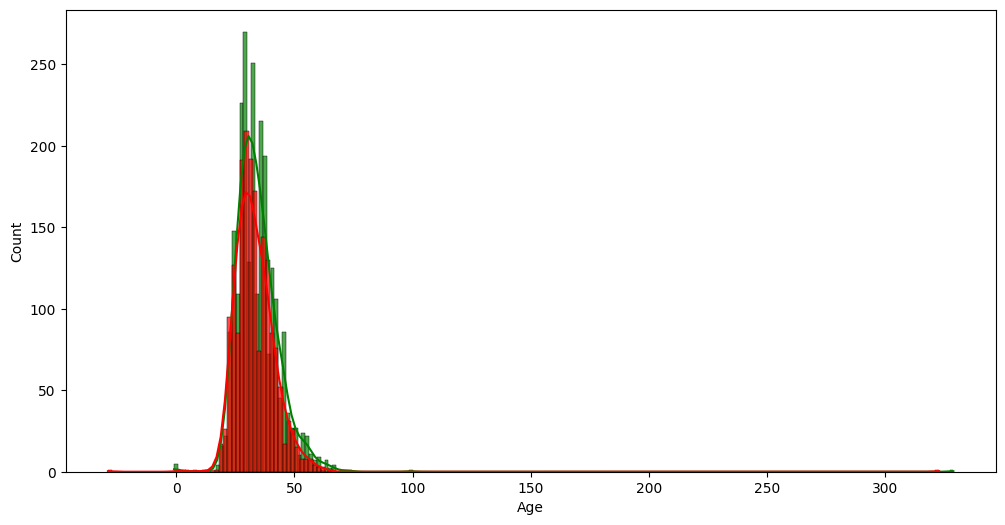

In [80]:
# Visualizando a distribuição das idades para quem procurou e quem não procurou tratamento
plt.figure(figsize=(12, 6))
sns.histplot(df_treatment_yes['Age'], color='green', kde=True, label='Procuraram tratamento', alpha=0.7)
sns.histplot(df_treatment_no['Age'], color='red', kde=True, label='Não procuraram tratamento', alpha=0.7)

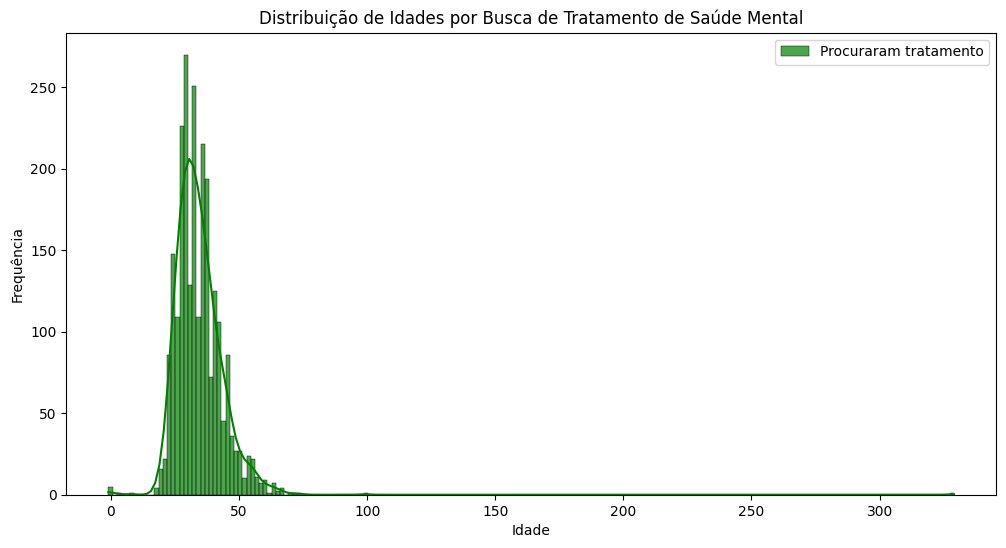

In [83]:
# Gráfico de histograma da distribuição de idades
# Ajuste do gráfico
plt.figure(figsize=(12, 6))

# Criação do histograma com KDE para quem procurou tratamento
sns.histplot(df_treatment_yes['Age'], color='green', kde=True, label='Procuraram tratamento', alpha=0.7)

# Adição de título e rótulos
plt.title('Distribuição de Idades por Busca de Tratamento de Saúde Mental')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibição da legenda
plt.legend()

# Exibição do gráfico
plt.show()

Cálculo de Probabilidade

In [91]:
# Calcular a probabilidade de uma pessoa procurar tratamento com base ao gênero
#prob_tratamento_genero = df_treatment_yes['Gender'].value_counts(normalize=True) /df_answers['Gender'].value_counts(normalize=True)
prob_tratamento_genero = df_treatment_yes['Gender'].value_counts() / dados['Gender'].value_counts()

print(f'A Probabilidade de procurar tratamento por genero: \n{prob_tratamento_genero}')

A Probabilidade de procurar tratamento por genero: 
Gender
-1                             0.666667
43                                  NaN
A little about you             1.000000
AFAB                           1.000000
Agender                        1.000000
                                 ...   
something kinda male?               NaN
sometimes                      1.000000
trans woman                    1.000000
transgender                    1.000000
uhhhhhhhhh fem genderqueer?    1.000000
Name: count, Length: 101, dtype: float64


In [92]:
# Definir faixas etárias para análise
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

In [98]:
dados['faixa_etaria'] = pd.cut(dados['Age'], bins=bins, labels=labels, right=False)

In [100]:
# Calcular a probabilidade de procurar tratamento por faixa etária
#prob_tratamento_faixa_etaria = dados[dados['answer_text'] == 'Yes'].value_counts(normalize=True) / dados['faixa_etaria'].value_counts(normalize=True)
prob_tratamento_faixa_etaria = dados[dados['answer_text'] == '1'].value_counts() / dados['faixa_etaria'].value_counts()

print(f'A Probabilidade de procurar tratamento por faixa etária: \n{prob_tratamento_faixa_etaria}')

A Probabilidade de procurar tratamento por faixa etária: 
Age  UserID  Gender  answer_text  faixa_etaria
18   119     Male    1            18-25           0.002538
37   741     Male    1            36-45           0.000776
     762     Female  1            36-45           0.000776
     763     Male    1            36-45           0.000776
     775     Male    1            36-45           0.000776
                                                    ...   
30   2060    Male    1            26-35           0.000478
     2071    Female  1            26-35           0.000478
     2175    Female  1            26-35           0.000478
     2229    Male    1            26-35           0.000478
99   1633    Other   1            65+             0.090909
Name: count, Length: 2404, dtype: float64


Teste e Hipóteses (ANOVA)

In [101]:
from scipy import stats

In [103]:
# Realizar ANOVA para compara a idade média entre diferentes gêneros
anova_result = stats.f_oneway(
    df_treatment_yes[df_treatment_yes['Gender'] == 'Male']['Age'],
    df_treatment_yes[df_treatment_yes['Gender'] == 'Female']['Age'],
    df_treatment_yes[df_treatment_yes['Gender'] == 'Other']['Age']
)

In [104]:
# Visualizar resultado
print(f'Resultado ANOVA: {anova_result}')

Resultado ANOVA: F_onewayResult(statistic=21.342733317214805, pvalue=6.658096940699216e-10)


Temos o resultado de que não existe relação entre a média das idades por gênero.